In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
data_preprocessed = pd.read_csv('Absenteeism_preprocessed.csv')
data_preprocessed.head(10)

,Reason_1,Reason_2,Reason_3,Reason_4,Month,Weekday,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2
5,0,0,0,1,7,4,179,51,38,239.554,31,0,0,0,2
6,0,0,0,1,7,4,361,52,28,239.554,27,0,1,4,8
7,0,0,0,1,7,4,260,50,36,239.554,23,0,4,0,4
8,0,0,1,0,7,0,155,12,34,239.554,25,0,2,0,40
9,0,0,0,1,7,0,235,11,37,239.554,29,1,1,1,8


#### The model will predict excessive absenteeism, for the purpose of this demonstration of  a logistic regression we will assume that anything above the median is excessive

In [3]:
med = data_preprocessed['Absenteeism Time in Hours'].median()
targets = np.where(data_preprocessed['Absenteeism Time in Hours'] > med,1,0)
data_preprocessed['Excessive Absenteeism'] = targets

In [4]:
data_preprocessed.head(5)

,Reason_1,Reason_2,Reason_3,Reason_4,Month,Weekday,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0


#### Check class balance

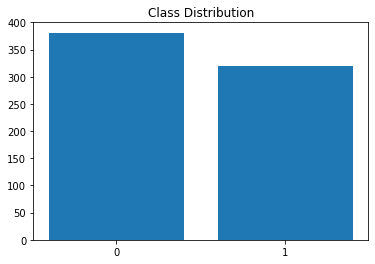

Target : Percentage
1 : 45.57%
0 : 54.43%


In [5]:
class_dist = Counter(targets)

plt.bar(class_dist.keys(),class_dist.values())
plt.xticks(list(class_dist.keys()),
           [k for k in class_dist.keys()],
           rotation=0
           )
plt.title('Class Distribution')
plt.show()
print('Target : Percentage')
for k in class_dist.keys():
    print(f'{k} : {class_dist[k]/len(targets)*100:.2f}%')


 The class ratio in reasonably balanced for this demonstration.

In [6]:
data_with_targets = data_preprocessed.drop(['Absenteeism Time in Hours'], axis=1)

In [7]:
data_with_targets.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month,Weekday,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,0


In [8]:
unscaled_inputs = data_with_targets.iloc[:,:-1]

In [9]:
from sklearn.preprocessing import StandardScaler
absenteeism_scaler = StandardScaler()

In [10]:
absenteeism_scaler.fit(unscaled_inputs)

StandardScaler()

In [11]:
scaled_inputs = absenteeism_scaler.transform(unscaled_inputs)

In [12]:
scaled_inputs

array([[-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
         0.88046927,  0.26848661],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
        -0.01928035, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
        -0.91902997, -0.58968976],
       ...,
       [ 1.73205081, -0.09298136, -0.31448545, ...,  2.23224237,
        -0.91902997, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ...,  2.23224237,
        -0.91902997, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
        -0.01928035,  0.26848661]])

In [13]:
scaled_inputs.shape

(700, 14)

#### Create Train Test split

In [14]:
from sklearn.model_selection import train_test_split

In [19]:
#  split data 
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size=0.8, random_state=42)

In [20]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(560, 14) (560,)
(140, 14) (140,)
